# Shapely
[Shapely](http://toblerity.org/shapely/project.html)-Manipulation and analysis of geometric objects in the Cartesian plane.

<img src="http://farm3.staticflickr.com/2738/4511827859_b5822043b7_o_d.png" />

Shapely is a BSD-licensed Python package for manipulation and analysis of planar geometric objects. It is based on the widely deployed GEOS (the engine of PostGIS) and JTS (from which GEOS is ported) libraries. Shapely is not concerned with data formats or coordinate systems, but can be readily integrated with packages that are. For more details, see:

    Shapely manual
    Shapely example apps

## Requirements

Shapely 1.3 requires

    Python >=2.6 (including Python 3.x)
    libgeos_c >=3.1 (3.0 and below have not been tested, YMMV)

## Installation

Windows users should use the executable installer, which contains the required GEOS DLL. Other users should acquire libgeos_c by any means, make sure that it is on the system library path, and install from the Python package index:

$ pip install Shapely

or from a source distribution with the setup script:

$ python setup.py install

* Warning

Windows users: do not under any circumstances use pip (or easy_install) to uninstall Shapely versions < 1.2.17. Due to the way Shapely used to install its GEOS DLL and a distribute or setuptools bug, your Python installation may be broken by an uninstall command. Shapely 1.2.17 will uninstall safely.

## Usage
Here is the canonical example of building an approximately circular patch by buffering a point:

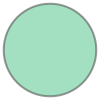

In [2]:
from shapely.geometry import Point

patch = Point(0.0, 0.0).buffer(10.0)
patch
#<shapely.geometry.polygon.Polygon object at 0x...>

In [3]:
patch.area
#313.65484905459385

313.6548490545939

See the manual for comprehensive usage snippets and the dissolve.py and intersect.py example apps.
Integration

Shapely does not read or write data files, but it can serialize and deserialize using several well known formats and protocols. The shapely.wkb and shapely.wkt modules provide dumpers and loaders inspired by Python’s pickle module.:

>>> from shapely.wkt import dumps, loads
>>> dumps(loads('POINT (0 0)'))
'POINT (0.0000000000000000 0.0000000000000000)'

All linear objects, such as the rings of a polygon (like patch above), provide the Numpy array interface.:

>>> from numpy import asarray
>>> ag = asarray(patch.exterior)
>>> ag
array([[  1.00000000e+01,   0.00000000e+00],
       [  9.95184727e+00,  -9.80171403e-01],
       [  9.80785280e+00,  -1.95090322e+00],
       ...
       [  1.00000000e+01,   0.00000000e+00]])

That yields a Numpy array of [x, y] arrays. This is not always exactly what one wants for plotting shapes with Matplotlib (for example), so Shapely 1.2 adds a xy property for obtaining separate arrays of coordinate x and y values.:

>>> x, y = patch.exterior.xy
>>> ax = asarray(x)
>>> ax
array([  1.00000000e+01,   9.95184727e+00,   9.80785280e+00,  ...])

Numpy arrays can also be adapted to Shapely linestrings:

>>> from shapely.geometry import asLineString
>>> asLineString(ag).length
62.806623139095073
>>> asLineString(ag).wkt
'LINESTRING (10.0000000000000000 0.0000000000000000, ...)'

Shapely can also integrate with other Python GIS packages using data modeled after GeoJSON.

>>> import json
>>> from shapely.geometry import mapping, shape
>>> s = shape(json.loads('{"type": "Point", "coordinates": [0.0, 0.0]}'))
>>> s
<shapely.geometry.point.Point object at 0x...>
>>> print(json.dumps(mapping(s)))
{"type": "Point", "coordinates": [0.0, 0.0]}

Development and Testing

Dependecies for developing Shapely are listed in requirements-dev.txt. Cython and Numpy are not required for production installations, only for development. Use of a virtual environment is strongly recommended.:

$ virtualenv .
$ source bin/activate
(env)$ pip install -r requirements-dev.txt
(env)$ python setup.py develop

Shapely uses a Zope-stye suite of unittests and doctests, exercised via setup.py.:

(env)$ python setup.py test

Nosetests won’t run the tests properly; Zope doctest suites are not currently supported well by nose.
Support

Please discuss Shapely with us at http://lists.gispython.org/mailman/listinfo/community.

Bugs may be reported at https://github.com/Toblerity/Shapely.
Credits

Shapely is written by:

    Sean Gillies
    Aron Bierbaum
    Kai Lautaportti
    Oliver Tonnhofer

Patches contributed by:

    Allan Adair (https://github.com/allanadair)
    Howard Butler
    Gabi Davar (https://github.com/mindw)
    Phil Elson (https://github.com/pelson)
    Johan Euphrosine (https://github.com/proppy)
    Bertrand Gervais (https://github.com/BertrandGervais)
    Marc Jansen (https://github.com/marcjansen)
    Kelsey Jordahl (https://github.com/kjordahl)
    Frédéric Junod
    Thomas Kluyver (https://github.com/takluyver)
    Eric Lemoine
    Naveen Michaud-Agrawal (https://github.com/nmichaud)
    psagers https://github.com/psagers
    Jeethu Rao (https://github.com/jeethu)
    Benjamin Root (https://github.com/WeatherGod)
    Jason Sanford (https://github.com/JasonSanford)
    Johannes Schönberger (https://github.com/ahojnnes)
    Jonathan Tartley
    Kristian Thy
    Mike Toews (https://github.com/mwtoews)
    Maarten Vermeyen (https://github.com/maarten-vermeyen)

See also: https://github.com/Toblerity/Shapely/graphs/contributors.

Additional help from:

    Justin Bronn (GeoDjango) for ctypes inspiration
    Martin Davis (JTS)
    Jaakko Salli for the Windows distributions
    Sandro Santilli, Mateusz Loskot, Paul Ramsey, et al (GEOS Project)

Major portions of this work were supported by a grant (for Pleiades) from the U.S. National Endowment for the Humanities (http://www.neh.gov).